In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

n = 30
# data = pd.DataFrame({
#     'stock_type': stock_type,
#     'stock_date': stock_date,
# })


## 构造股票数据
open = np.array(np.random.normal(350, 20, size=n))
close = np.array(np.random.normal(350, 20, size=n))
low = []
high = []
for i in range(n):
    min = open[i]
    max = close[i]
    if open[i] >= close[i]:
        min = close[i]
        max = open[i]
    val1 = np.random.uniform(min-20, max+20, 1)
    if val1 < min:
        val2 = np.random.uniform(min, max+20, 1)
    if val1 > max:
        val2 = np.random.uniform(min-20, max, 1)

    if val1 < val2:
        low.append(val1)
        high.append(val2)
    else:
        low.append(val2)
        high.append(val1)

data = pd.DataFrame({
    'type': np.array(['AAPL' for _ in range(n)]),
    'date': np.array(pd.date_range(start='2018-01-01', periods=n, freq='B')),
    'open': open,
    'high': np.array(high).reshape(n),
    'low': np.array(low).reshape(n),
    'close': close,
    'volume': np.array(np.random.randint(1000000, 3000000, size=n)),
}, columns=['type', 'date', 'open', 'high', 'low', 'close', 'volume'])

data.to_csv('stock_data.csv', index=False)

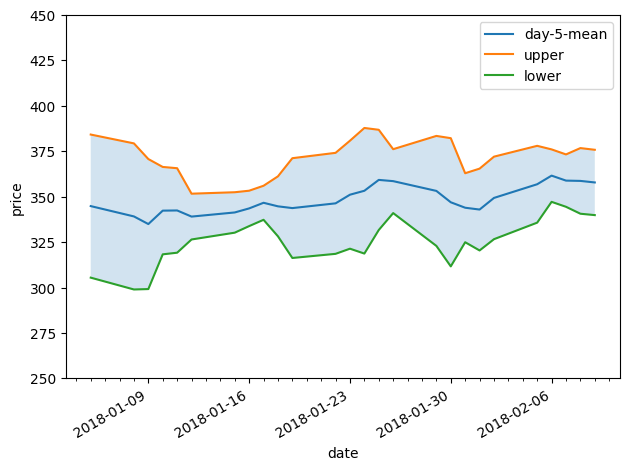

In [25]:
## 布林带
import matplotlib.dates as md

## 5日均值
day_5_mean = np.convolve(data['close'], np.ones(5)/5, mode='valid')
## 布林带
stds_5 = np.array([np.std(data['close'][i:i+4]) for i in range(day_5_mean.shape[0])])
upper = day_5_mean + 2 * stds_5
lower = day_5_mean - 2 * stds_5

plt.figure()
plt.plot(data['date'][4:], day_5_mean, label='day-5-mean')
plt.plot(data['date'][4:], upper, label='upper')
plt.plot(data['date'][4:], lower, label='lower')
plt.fill_between(data['date'][4:], upper, lower, upper > lower, alpha=0.2)
ax = plt.gca()
ax.xaxis.set_major_locator(md.WeekdayLocator())
ax.xaxis.set_minor_locator(md.DayLocator())
plt.legend()
plt.ylim(250, 450)
plt.xlabel('date')
plt.ylabel('price')
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.show()

线性拟合

前提,假设关系是线性关系!!!
a b c d e f g h

ax + by + cz = d

bx + cy + dz = e

cx + dy + ez = f

dx + ey + fz = ?

$\begin{bmatrix} a & b & c \\ b & c & d \\ c & d & e \end{bmatrix}$ x $\begin{bmatrix} x \\ y \\ z\end{bmatrix}$ = $\begin{bmatrix} d \\ e \\ f \end{bmatrix}$

通过前三项,预设第四项,依次往后推

x = np.linalg.lstsq(A, B)[0]

(30,)
(25,)
[323.5747706  363.09306329 337.34975124 336.12446258 342.74218156
 341.46835251 348.55655702 707.94132124 430.74547537 514.8532433
 305.6691231  387.29763044 257.12860474 430.30740989 409.49415963
 324.05046233 377.99407395 353.21832293 265.74895881 382.53842455
 377.76494345 413.74926698 312.15240569 309.31723339 312.78932606]


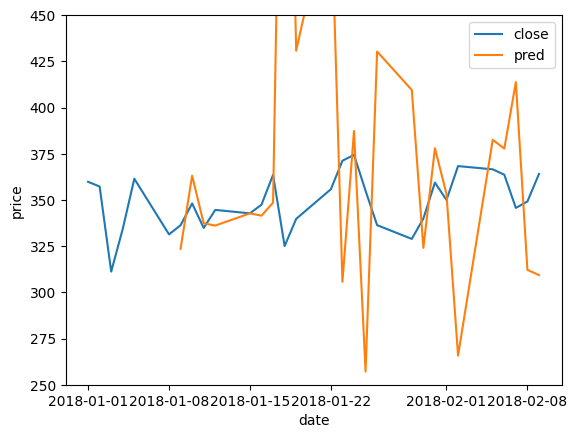

In [42]:
## 线性模型和线性拟合
## 预测收盘价--线性的!!!

n = 3
close_prices = data['close']
print(close_prices.shape)

pred_prices = np.zeros(close_prices.shape[0] - 2*n + 1)
print(pred_prices.shape)
for i in range(pred_prices.shape[0]):
    # 构造矩阵A 和 结果矩阵B
    A = np.zeros((n, n))
    for j in range(n):
        A[j] = close_prices[i+j: i +j + n]
    B = close_prices[n + i :2*n +i]
    # print(A, B , sep='\n')
    X = np.linalg.lstsq(A, B)[0] ## 预测的线性参数
    # print(X)
    pred = B.dot(X)
    # print(pred_prices, close_prices[2*n])
    pred_prices[i] = pred
print(pred_prices)

plt.figure()
plt.plot(data['date'], data['close'], label='close')
plt.plot(data['date'][2*n:], pred_prices[:-1], label='pred')
plt.xlabel('date')
plt.ylabel('price')
plt.ylim(250, 450)
plt.legend()
plt.show()


## 线性拟合
[$x_1, y_1], [x_2, y_2], ... , [x_n, y_n$]
根据线性 $y=kx + b$, 得到:

$y_1 = k * x_1$

$y_2 = k * x_2$

...

$y_n = k * x_n$

$\begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1 \\
      ... \\
    x_n & 1 \\
\end{bmatrix}$ x $\begin{bmatrix}k \\ b\end{bmatrix}$=
$\begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n \\
\end{bmatrix}$

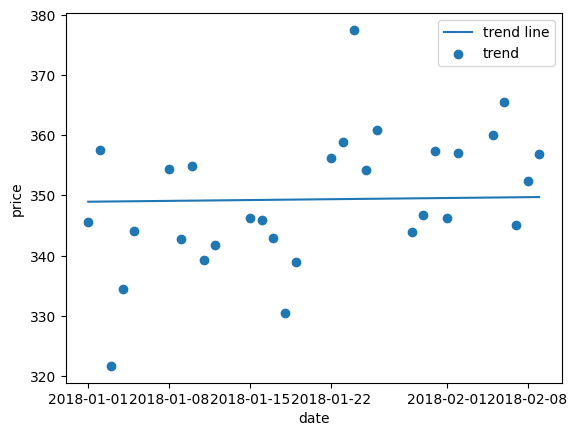

In [52]:
## 线性拟合--求k和b
trend_point = ( data['close'] + data['high'] + data['low'] ) / 3
## 构造A B矩阵,求得k,b
days = data['date'].astype(np.int64)
A = np.ones((trend_point.shape[0], 2)).T
A[0] = days
A = A.T
X = np.linalg.lstsq(A, trend_point)[0]
k = X[0]
b = X[1]

line = days * k + b

plt.figure()
plt.plot(data['date'], line, label='trend line')
plt.scatter(data['date'], trend_point, label='trend')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.show()